# Outputs

The output of the *cpd* function is of the form

                        factors, T_approx, outputs

We will see what each one of these outputs represents. Let's start importing the necessary modules and creating the same tensors of the previous lessons.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TensorFox as tfx

In [2]:
# Create and print the tensor.
m = 2
T = np.zeros((m, m, m))
s = 0

for k in range(m):
    for i in range(m):
        for j in range(m):
            T[i,j,k] = s
            s += 1
                   
tfx.disp.showtens(T)

[[0. 1.]
 [2. 3.]]

[[4. 5.]
 [6. 7.]]



# The list *factors* and the array *T_approx*

Given the tensor $T \in \mathbb{R}^{I_1 \times I_2 \times \ldots \times I_L}$ and a rank $r$, the most important output of the CPD function is the list *factors*. This is a list of $L$ matrices $W^{(1)}, \ldots, W^{(L)}$ such that $W^{(\ell)} \in \mathbb{R}^{I_\ell \times r}$. These are the factor matrices of the approximated CPD, and they are such that 

$$T_{approx} = (W^{(1)}, \ldots, W^{(L)}) \cdot I,$$
where $I$ is the unit diagonal tensor with of shape $\underbrace{r \times r \times \ldots \times r}_{L \text{ times}}$. Ideally, we want to have $T_{approx} \approx T$. 

# The list *outputs*

As the name suggests, *outputs* contains information about all the computations made to achieve the approximate CPD of $T$. If $T$ is a third order tensor, then *outputs* is a class, not a list. This *output* comes with the following variables:

- **num_steps**: Total number of steps (iterations of dGN) made in the two stages, main and refinement.

- **rel_error**: $\displaystyle = \frac{\|T - T_{approx}\|}{\|T\|}$

- **accuracy**: It is the value $100\cdot (1 - $*rel_error*$)$. If the relative error is too big (bigger than $1$), the program just set the accuracy to $0$ so there is no negative accuracy. 

- **step_sizes**: It is a list with two arrays. The arrays contains sizes of the steps given at each iteration of the function *dGN* in the first (main) and seconds (refinement) stages.

- **errors**: It is a list with two arrays. The arrays contains relative errors at each iteration of the function *dGN* in the first (main) and seconds (refinement) stages.

- **improv**: It is a list with two arrays. The arrays contains the differences between consecutive relative errors at each iteration of the function *dGN* in the first (main) and second (refinement) stages.

- **gradients**: It is a list of two arrays. The arrays contains the infinity norm of the gradient at each iteration of the function *dGN* in the first (main) and seconds (refinement) stages. We expect that both arrays converges to zero since the minimum is a critical point.

- **stop**: It is a list with three integers. The first one is a number indicating what kind of truncation was obtained by the function *mlsvd* (because this function computes the MLSVD and truncates it immediately). The second one is a number indicating what stopping condition made the *dGN* function stop iterating at the main stage, and the third one is a number indicating what stopping condition made the *dGN* function stop iterating at the refinement stage.

- **stop_msg**: This method prints messages describing the reason for each stop at each one of the three stages mentioned in the list *stop* above.

- **options**: All the options the user gave as input are also passed as output, together with the other default options. The tolerance parameters are changed during the program, as already mentioned before. The parameters *method, method_maxiter* and *method_tol* are joined in a list called *method_parameters*, and the parameters *low, upp* and *factor* are joined in a list called *constraints*.

If $T$ has order higher than $3$, than *outputs* is a list of classes, where each class correspond to the output class of a third order tensor computed to form the train tensor format. If the parameter *trials* is bigger than $1$, only the best third order CPD (of each piece of the tensor train) reported have its class passed as output. At the end of the day, *outputs* is a list of $L-2$ classes so that *outputs[0]* refers to the class of the first CPD computed, *outputs[1]* refers to the second one, and so on.

In [3]:
# Compute the CPD of T.
class options:
    display = 1
    refine = True

r = 3
factors, T_approx, output = tfx.cpd(T, r, options)

-----------------------------------------------------------------------------------------------
Computing MLSVD
    No compression detected
    Working with dimensions (2, 2, 2)
-----------------------------------------------------------------------------------------------
Type of initialization: random
-----------------------------------------------------------------------------------------------
Computing CPD

Computing refinement of solution
-----------------------------------------------------------------------------------------------
Computing CPD
Final results
    Number of steps = 34
    Relative error = 2.3412204124629683e-07
    Accuracy =  99.99998 %


In [4]:
# Show the informations contained in the class 'output'
print('Number of steps in main stage:', output.step_sizes[0].size)
print()
print('Number of steps in refinement stage:', output.step_sizes[1].size)
print()
print('Total number of steps:', output.num_steps)
print()
print('Relative error:', output.rel_error)
print()
print('Accuracy:', np.round(output.accuracy,5), '%')
print()
print('Stop numbers:', output.stop)
print()
print()
print('Description of each stop:') 
print('-------------------------')
print(output.stop_msg())
print()
print('Options used:')
print('-------------')
print('Maximum number of iterations:', output.options.maxiter)
print()
print('Tolerance:', output.options.tol)
print()
print('Inner algorithm description: [method, method_maxiter, method_tol] =', output.options.method_parameters)
print()
print('Method of initialization:', output.options.init_method)
print()
print('Truncation dims given (0 if not given):', output.options.trunc_dims)
print()
print('Level of truncation:', output.options.level)
print()
print('Initial damping parameter factor:', output.options.init_damp)
print()
print('Refinement:', output.options.refine)
print()
print('Symmetry:', output.options.symm)
print()
print('Constraints: [low, upp, factor] =', output.options.constraints)
print()
print('Trials (only applicable for tensor of order higher than 3):', output.options.trials)
print()
print('Display:', output.options.display)

Number of steps in main stage: 30

Number of steps in refinement stage: 4

Total number of steps: 34

Relative error: 2.3412204124629683e-07

Accuracy: 99.99998 %

Stop numbers: [3, 2, 2]


Description of each stop:
-------------------------
MLSVD stop:
3 - The program was unable to truncate at the very first attempt. In this case the MLSVD singular values are equal or almost equal. The program stops the truncation process when this happens.

Main stop:
2 - The gradient is close enough to 0.

Refinement stop:
2 - The gradient is close enough to 0.


Options used:
-------------
Maximum number of iterations: 200

Tolerance: 8e-12

Inner algorithm description: [method, method_maxiter, method_tol] = ['cg', 1, 8e-12]

Method of initialization: random

Truncation dims given (0 if not given): 0

Level of truncation: 1

Initial damping parameter factor: 1

Refinement: True

Symmetry: False

Constraints: [low, upp, factor] = [0, 0, 0]

Trials (only applicable for tensor of order higher than 3):

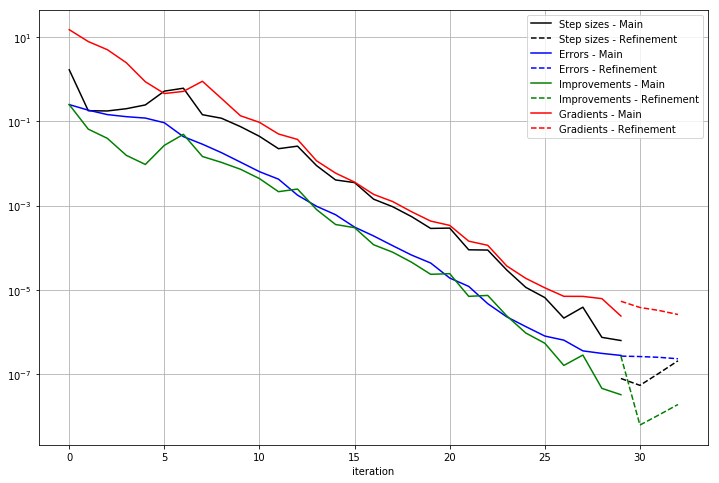

In [5]:
# The outputs step_sizes, errors, errors_diff and gradients are plotted together below
# We put both stages (main and refinement) in the same plot.
plt.figure(figsize=[12,8])

# We divide the arrays of errors by the norm of T to obtain values associated to the relative errors.
Tsize = np.linalg.norm(T)

# a is the size of the arrays of the main stage and b is the size of the arrays of the refinement stage.
a = output.step_sizes[0].size
b = output.step_sizes[1].size

# Step sizes
plt.plot(np.arange(a), output.step_sizes[0],'k-' , markersize=2, label='Step sizes - Main')
plt.plot(np.arange(a-1, a+b-1), output.step_sizes[1],'k--' , markersize=2, label='Step sizes - Refinement')

# Errors
plt.plot(np.arange(a), output.errors[0],'b-' , markersize=2, label='Errors - Main')
plt.plot(np.arange(a-1, a+b-1), output.errors[1],'b--' , markersize=2, label='Errors - Refinement')

# Errors diff
plt.plot(np.arange(a), output.improv[0], 'g-', markersize=2, label='Improvements - Main')
plt.plot(np.arange(a-1, a+b-1), output.improv[1], 'g--', markersize=2, label='Improvements - Refinement')

# Gradients
plt.plot(np.arange(a), output.gradients[0], 'r-', markersize=2, label='Gradients - Main')
plt.plot(np.arange(a-1, a+b-1), output.gradients[1], 'r--', markersize=2, label='Gradients - Refinement')

plt.xlabel('iteration')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()